# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)
Mục đích: Khám phá, hiểu rõ cấu trúc, chất lượng trong bộ dữ liệu 
- 1. Thông tin cơ bản 
- 2. Thống kê mô tả 
- 3. Giá trị bị thiếu (Missing Values)
- 4. Phân phối biến mục tiêu (SalePrice)
- 5. Phân tích tương quan
- 6. Phát hiện nhiễu (Outliers)
- 7. Phân tích biến phân loại


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from scipy import stats

warnings.filterwarnings('ignore') 
%matplotlib inline

# 1. THÔNG TIN CƠ BẢN VỀ DỮ LIỆU 

In [3]:
data_path = '../data/raw/train.csv'
print("\n Đang đọc dữ liệu huấn luyện từ file CSV...")
df = pd.read_csv(data_path)
print(" Dataset đã được tải thành công!")

print("-" * 66)
print("\t\t   THÔNG TIN CƠ BẢN VỀ BỘ DỮ LIỆU ")
print("-" * 66)
print(f" Kích thước bộ dữ liệu: {df.shape}")
print(f" Bộ dữ liệu có {df.shape[0]} mẫu")
print(f" Bộ dữ liệu có {df.shape[1]} đặc trưng")
print(f" Các cột trong bộ dữ liệu: {df.columns.tolist()}")


 Đang đọc dữ liệu huấn luyện từ file CSV...
 Dataset đã được tải thành công!
------------------------------------------------------------------
		   THÔNG TIN CƠ BẢN VỀ BỘ DỮ LIỆU 
------------------------------------------------------------------
 Kích thước bộ dữ liệu: (1460, 81)
 Bộ dữ liệu có 1460 mẫu
 Bộ dữ liệu có 81 đặc trưng
 Các cột trong bộ dữ liệu: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFul

In [4]:
print("-" * 66)
print("\t\t   5 mẫu đầu tiên của bộ dữ liệu")
print("-" * 66)
print(df.head())

------------------------------------------------------------------
		   5 mẫu đầu tiên của bộ dữ liệu
------------------------------------------------------------------
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN

# 2. THỐNG KÊ MÔ TẢ

In [5]:
print("-" * 66)
print("\t\t    Thông tin về bộ dữ liệu")
print("-" * 66)
print(df.info())
display(df.describe().T.style.background_gradient(cmap='Blues'))

------------------------------------------------------------------
		    Thông tin về bộ dữ liệu
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


# 3. THÔNG TIN GIÁ TRỊ BỊ THIẾU 


In [6]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count = missing_count[missing_count > 0]

print("-" * 66)
print("\t     Kiểm tra giá trị thiếu trong bộ dữ liệu")
print("-" * 66)

if not missing_count.empty:
    display(missing_count.to_frame("Số lượng thiếu").style.background_gradient(cmap='Reds'))
else:
    print("\n * KHÔNG CÓ GIÁ TRỊ NÀO BỊ THIẾU!")

------------------------------------------------------------------
	     Kiểm tra giá trị thiếu trong bộ dữ liệu
------------------------------------------------------------------


,Số lượng thiếu
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


# 4. PHÂN PHỐI BIẾN SALEPRICE

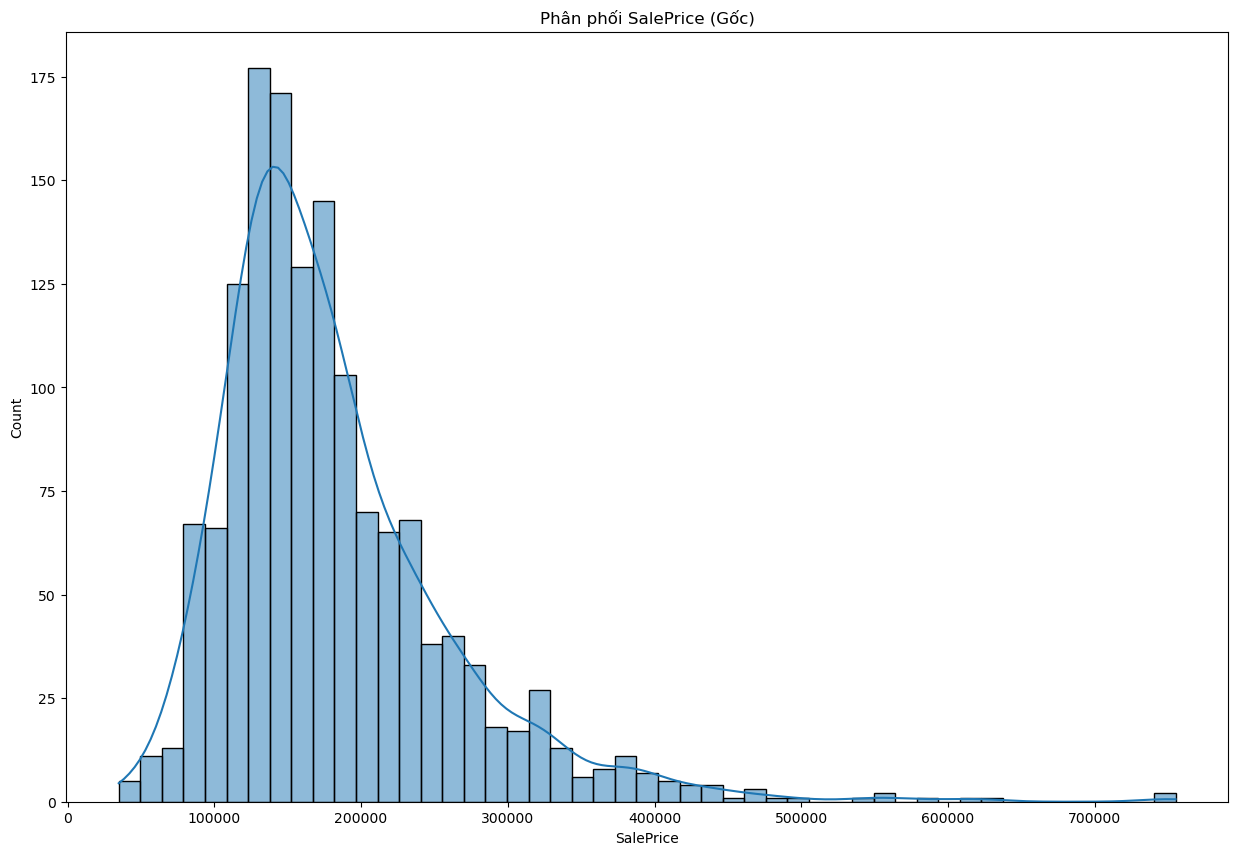

Độ lệch : 1.8828757597682129
Độ nhọn : 6.536281860064529


In [7]:
# Phân tích SalePrice
plt.figure(figsize=(15, 10))

# Biểu đồ phân phối gốc
sns.histplot(df['SalePrice'], kde=True)
plt.title('Phân phối SalePrice (Gốc)')
plt.xlabel('SalePrice')
plt.show()

# Kiểm tra độ lệch 
print(f"Độ lệch : {df['SalePrice'].skew()}")
print(f"Độ nhọn : {df['SalePrice'].kurt()}")


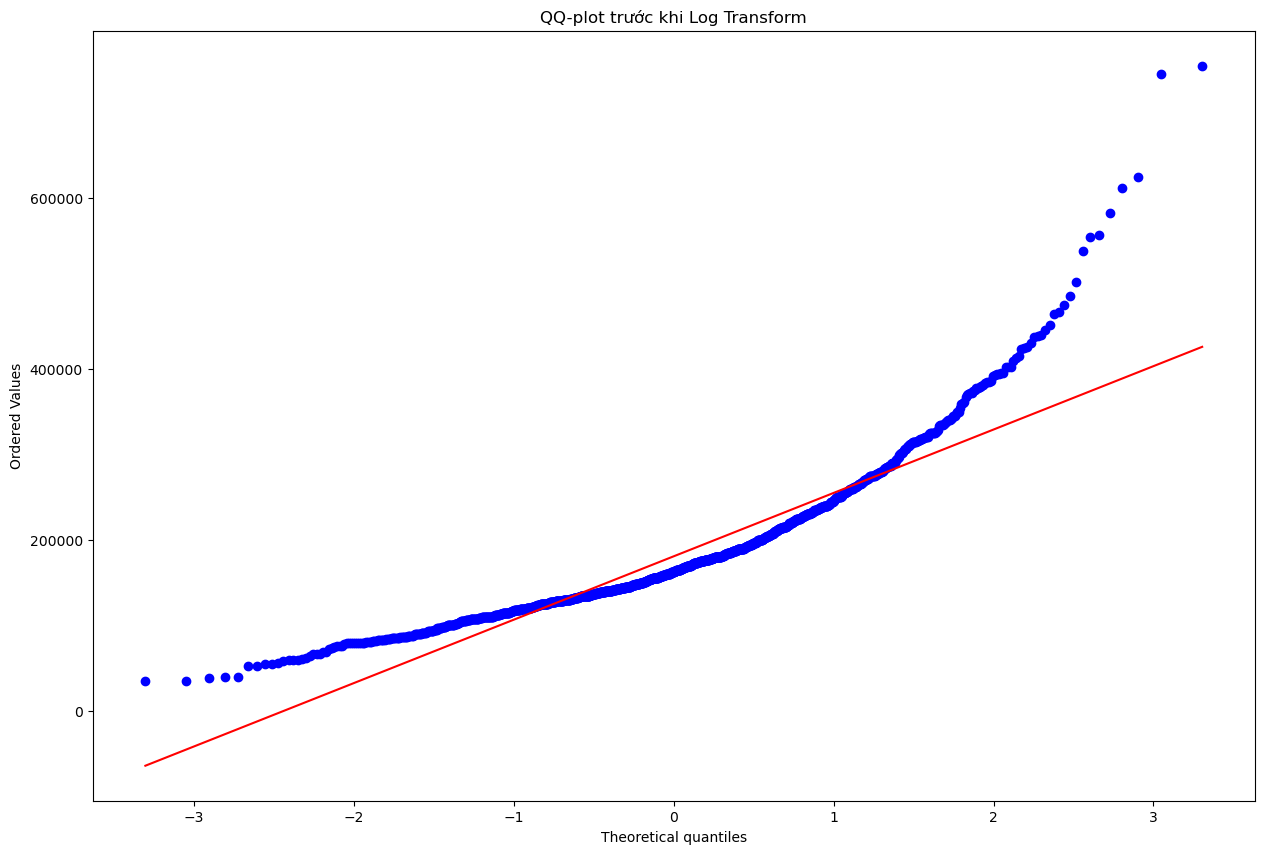

In [8]:
# QQ-plot cho SalePrice
plt.figure(figsize=(15,10))
stats.probplot(df['SalePrice'], plot=plt)
plt.title('QQ-plot trước khi Log Transform')
plt.show()


# 5. PHÂN TÍCH TƯƠNG QUAN 

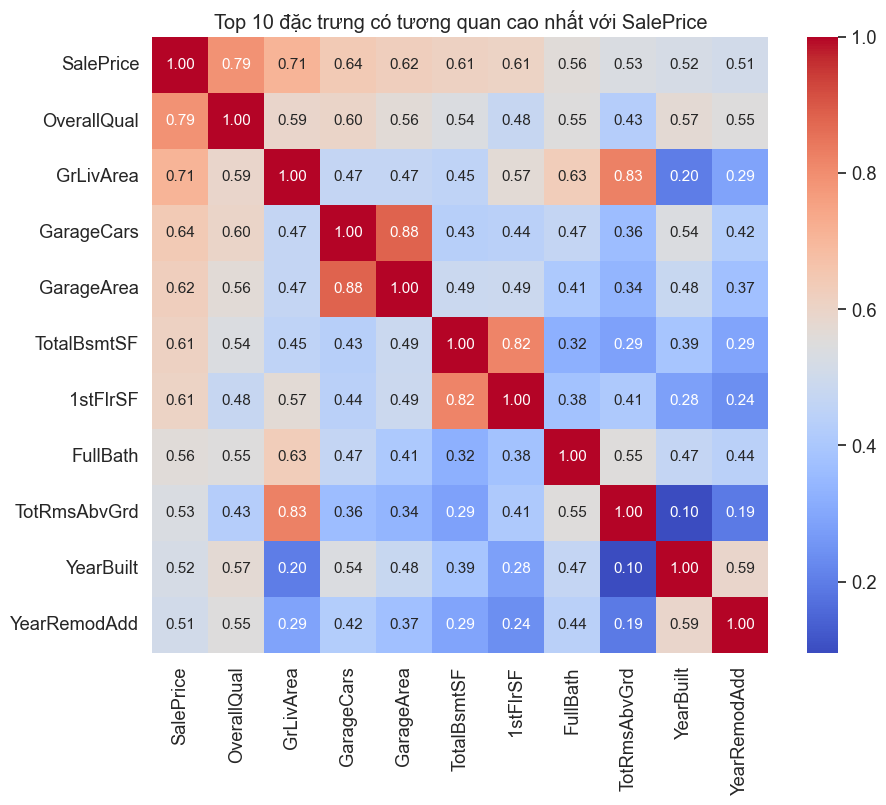

------------------------------------------------------------------
	Top 10 đặc trưng có tương quan cao nhất với SalePrice 
------------------------------------------------------------------


,STT,Đặc trưng,Hệ số tương quan
0,1,OverallQual,0.7910
1,2,GrLivArea,0.7086
2,3,GarageCars,0.6404
3,4,GarageArea,0.6234
4,5,TotalBsmtSF,0.6136
5,6,1stFlrSF,0.6059
6,7,FullBath,0.5607
7,8,TotRmsAbvGrd,0.5337
8,9,YearBuilt,0.5229
9,10,YearRemodAdd,0.5071


In [14]:
# Chỉ lấy các cột số để tính correlation
corr = df.corr(numeric_only=True)

k = 11  # Số đặc trưng cần lấy (bao gồm cả 'SalePrice')
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', square=True, annot_kws={'size' : 11}, yticklabels=cols, xticklabels=cols, cmap='coolwarm')
plt.title('Top 10 đặc trưng có tương quan cao nhất với SalePrice')
plt.show()

# Top 10 đặc trưng quan trong nhất gồm
print("-" * 66)
print("\tTop 10 đặc trưng có tương quan cao nhất với SalePrice ")
print("-" * 66)

top10 = (
    corr['SalePrice']
    .drop('SalePrice')
    .sort_values(ascending=False)
    .head(10)
)

table_df = pd.DataFrame({
    "STT": range(1, len(top10) + 1),
    "Đặc trưng": top10.index,
    "Hệ số tương quan": top10.values
})

table_df.style \
    .format({"Hệ số tương quan": "{:.4f}"}) \
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]},
        {"selector": "th", "props": [("background-color", "#4C72B0"), ("color", "white")]},
        {"selector": "td", "props": [("text-align", "center")]}
    ])




# 6. PHÁT HIỆN NHIỄU 

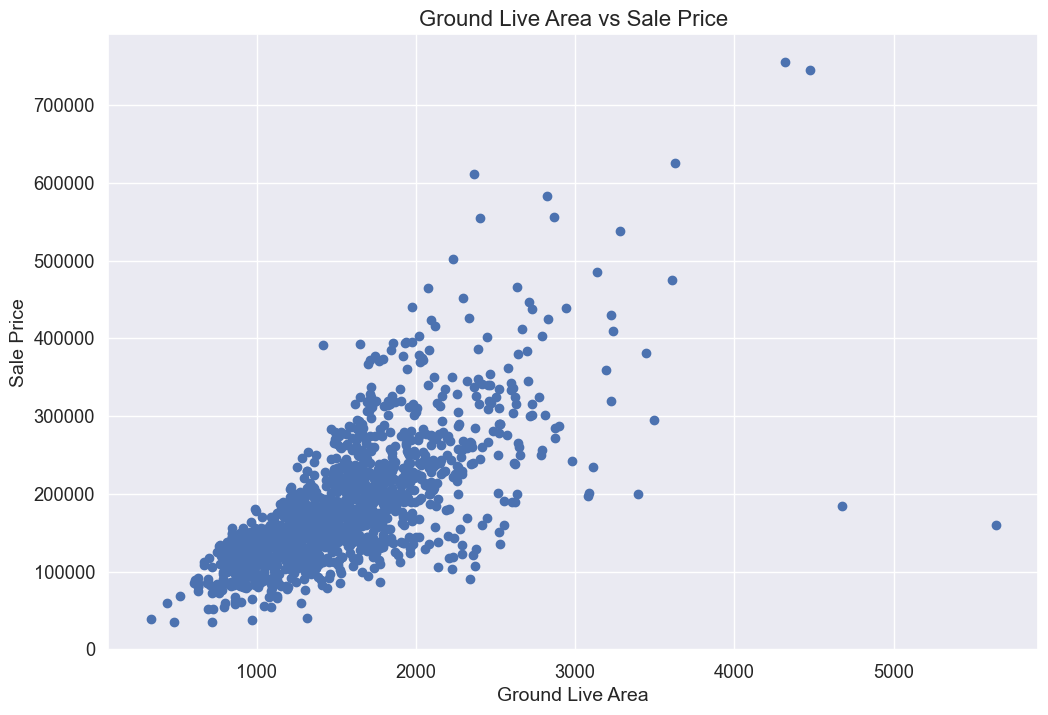

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('Ground Live Area', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.title('Ground Live Area vs Sale Price', fontsize=16)
plt.show()


# 7. PHÂN TÍCH BIẾN PHÂN LOẠI 

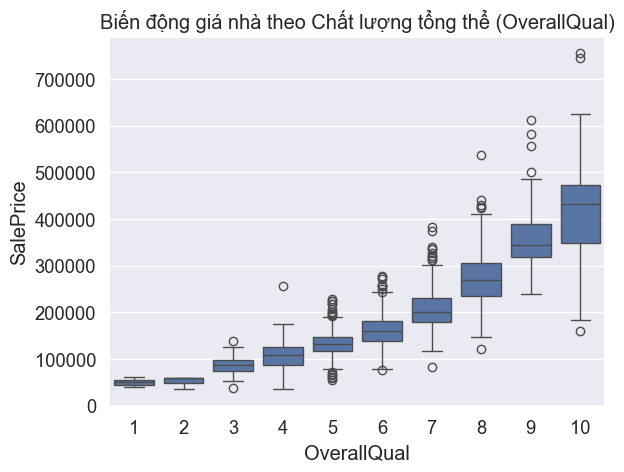

In [16]:
# Vẽ box plot thể hiện biến động giá nhà theo chất lượng tổng thể
plt.plot(figsize=(30, 20))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Biến động giá nhà theo Chất lượng tổng thể (OverallQual)')
plt.show()


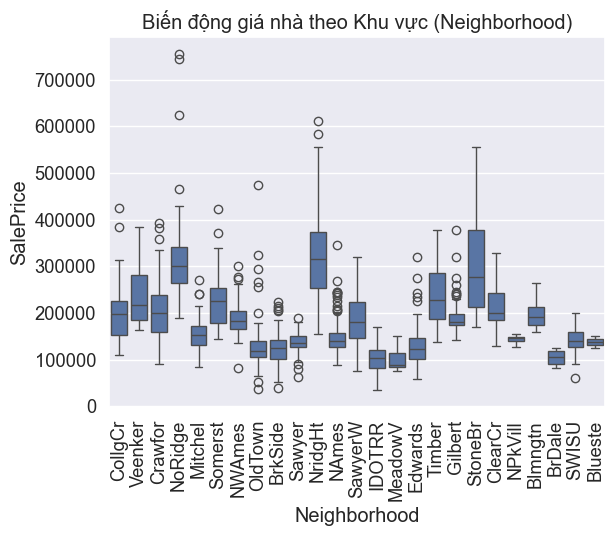

In [17]:
# Vẽ box plot thể hiện biến động giá nhà theo khu vực
plt.plot(figsize=(30, 20))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90) 
plt.title('Biến động giá nhà theo Khu vực (Neighborhood)')
plt.show()